# **Previsão de tráfego baseado na análise quantitativa e tipos de veículos**


**Aluno:** Kelmo Siqueira dos Anjos

*Pós-graduação em Ciência de Dados e Analytics*

*MVP da Sprint Machine Learning & Analytics*



![Previsões Acionárias Baseadas em Indicadores](https://raw.githubusercontent.com/Kelmosiqueira/Dados/refs/heads/main/Dataset/Transito.png)


## **Estrutura do projeto:**

[**1. Definição do problema:**](#1)

[**2. Preparação dos dados**](#2)

[**3. Modelagem e treinamento**](#3)

[**4. Avaliação de resultados:**](#4)

[**5. Conclusão:**](#5)




### **1. Definição do Problema:**

O gerenciamento do tráfego de veículos em ambientes urbanos representa um grande desafio para os órgãos de trânsito das cidades. Criar modelos de predição de trânsito a partir de informações de tráfego possibilita um melhor planejamento da utilização das vias públicas, gerenciamento de congestionamentos e auxilia na elaboração de políticas públicas de trânsito.

- **Objetivo:**

Este projeto tem como objetivo elaborar um modelo que possibilite a previsão do trânsito a partir de informações do quantitativo e tipos de veículos identificados nas vias públicas. Possibilitando classificar se o trânsito está low (baixo), normal (normal), heavy (pesado) ou high (alto) em função do quantitativo e tipo de veículo.

Com essas informações será possível realizar um melhor gerenciamento do trânsito em uma cidade e o planejamento de ações, tais como: restrição de tráfego de caminhões em determinados horários, criação de corredores de ônibus, criação de ciclovias, entre outras ações.


- **Tipo de Problema**

Em função da descrição do problema, o modelo a ser elaborado necessitará fazer a associação entre os atributos das informações de tráfego com uma classe (low, normal, heavy e high) caracterizando um problema de classificação supervisionada.


- **Premissas e Hipóteses:**

  - **Premissa**: A quantidade e o tipo de veículo em vias urbanas influenciam no trânsito das vias urbanas.
  - **Hipótese**: A partir de um modelo de machine learning, treinado com dados históricos do volume e tipo de veículos, será possível prever a situação do trânsito nas vias públicas de uma cidade..

- **Restrições e Condições:**

  - **Restrição**: Os dados utilizados para treinar o modelo foram obtidos do site da Kaggle, e representam informações foram coletadas em uma única via de veículos em uma cidade.
  - **Condição**: A análise do modelo será realizada apenas com os dados históricos obtidos no dataset disponível no site Kaggle.

  
- **Descrição do dataset:**

O dataset foi obtido a partir do site Kaggle (https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset) e foi criado a partir de informações que foram obtidas por um modelo de visão computacional que detecta quatro tipos de veículos: carros, bicicletas, ônibus e caminhões.

O dataset possui dados referentes a coleta de informações a cada 15 minutos da quantidade e tipo de veículos em uma via pública, ao longo de 2 (dois) meses. Além disso, disponibiliza uma coluna que indica a situação do tráfego categorizada em quatro classes:  Low, Normal, Heavy e High. Possibilitando avaliar o nível de congestionamento e as condições de tráfego em diferentes horários e dias da semana.

Os dados do dataset foram disponibilizados no formato CSV e apresenta as seguintes colunas:

**Time:** Hora da coleta dos dados.

**Date:** Data da coleta, contendo o dia do mês.

**Day of the week:** Dia da semana que foi coletado o dado.

**CarCount:** Quantidade de carros.

**BikeCount:** Quantidade de bicicletas.

**BusCount:** Quantidade de ônibus.

**TruckCount:** Quantidade de caminhões.

**Total:** O total de veículos, corresponde a soma dos dados CarCount, BikeCount, BusCount e TruckCount.

**Trafic Situation:** Indica a situação do tráfego no momento da coleta ( Low, Normal, Heavy e High).


Em atualizações futuras do dataset, está prevista a inclusão de dados referentes a velocidade dos veículos e novas rotas, possibilitando uma melhor análise para o gerenciamento de tráfego.




Inicialmente serão realizadas a importação de bibliotecas necessárias para realização de cálculos, elaboração de gráficos e ações para tratamento de dados e análise de modelos de machine learning.

  


In [1]:
#Bibliotecas necessárias para o projeto
#
#Bibliotecas para realização de cálculos e gráficos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas para ações realicionadas ao machine learning
from sklearn.preprocessing import OrdinalEncoder  #Proporciona a conversão para valores numericos
from sklearn.model_selection import train_test_split  # Proporciona particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold  # Proporciona preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score  # Proporciona executar a validação cruzada
from sklearn.metrics import accuracy_score  # Proporciona a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier  # Importa o algoritmo KNN
from sklearn.tree import DecisionTreeClassifier  # Importa o algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB  # Importar o algoritmo Naive Bayes
from sklearn.svm import SVC # Importa o algoritmo SVM
from sklearn.preprocessing import Normalizer #Proporciona realizar a normalização
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Possibilita para aplicar um filtro de warnings para ignorar mensagens durante a execução do código
import warnings
warnings.filterwarnings("ignore")

Os dados utilizados no projeto foram obtidos a partir do site Kaggle e disponibilizados no repositório do github no formato CSV.

Com o intuito de ter um melhor entendimento, foram atribuídos identificadores (labels) para os atributos que compõem o dataset e associados a variável “labels_atributo”, do tipo lista.

O dataset foi importado para a variável “transito” no formato de Dataframe para ser analisados pelos modelos de machine learning.

In [2]:
# Realizar a carga do dataset contido em um arquivo csv

#Link contendo o dataset para download sendo atribuído a variável "url_dados"
url_dados = "https://raw.githubusercontent.com/Kelmosiqueira/Dados/refs/heads/main/Dataset/TrafficTwoMonth.csv"

#Atribuição de labels para os atributos de dados do dataset para melhor entendimento
labels_atributos = ['Hora', 'Data', 'Dia_semana', 'Qt_carro', 'Qt_bicicleta', 'Qt_Onibus', 'Qt_caminhao', 'Total', 'Trafego']

#Criação do Dataframe "transito" contendo o Dataset da "url_dados" e a atribuição dos labels dos atributos (labels_atributos)
transito = pd.read_csv(url_dados, names=labels_atributos)

### **2. Preparação dos dados**

O dataset apresenta 5952 registros e 9 atributos.

A coluna “Trafego” representa a classe do dataset, sendo do tipo “object”, podendo assumir os valores "low", "normal", "heavy" e"high".

Os atributos “Hora” e “Dia_da_semana” são do tipo “object” e são estruturados no seguinte formato:


  - **“Hora”** é composto da hora da coleta e a informação “AM” ou “PM”. Por exemplo: “1:00:00 AM”;
  - **“Dia_da_semana”** irá ser representado pelos seguintes valores: "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday";

     

Os demais atributos do dataset são do tipo “int64”, podendo ser constatado pelo comando “transito.head()”.

In [3]:
#Informações sobre o dataset

print("Dimensões do Dataset (registros, atributos):",transito.shape)
print("\nTipos dos dados dos atributos do Dataset:\n")
print(transito.dtypes)
print("\nAmostra de dados do Dataset:\n")
transito.head()

Dimensões do Dataset (registros, atributos): (5952, 9)

Tipos dos dados dos atributos do Dataset:

Hora            object
Data             int64
Dia_semana      object
Qt_carro         int64
Qt_bicicleta     int64
Qt_Onibus        int64
Qt_caminhao      int64
Total            int64
Trafego         object
dtype: object

Amostra de dados do Dataset:



,Hora,Data,Dia_semana,Qt_carro,Qt_bicicleta,Qt_Onibus,Qt_caminhao,Total,Trafego
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


A partir do método **“isna()”**, em conjunto com “sum()”, é possível verificar a existência e a quantidade de valores não válidos nas colunas do dataset. Nesse caso, não foram encontrados valores não válidos;

In [4]:
#Irá retornar a quantidade de valores não válidos nas colunas
transito.isna().sum()

,0
Hora,0
Data,0
Dia_semana,0
Qt_carro,0
Qt_bicicleta,0
Qt_Onibus,0
Qt_caminhao,0
Total,0
Trafego,0


A partir do método **“isnull()”**, em conjunto com “sum()”, é possível verificar a existência e a quantidade de valores nulos nas colunas do dataset. Nesse caso, não foram encontrados valores nulos;

In [5]:
#Irá retornar a quantidade de valores nulos nas colunas
transito.isnull().sum()

,0
Hora,0
Data,0
Dia_semana,0
Qt_carro,0
Qt_bicicleta,0
Qt_Onibus,0
Qt_caminhao,0
Total,0
Trafego,0


Os modelos de machine learning necessitam que os dados sejam do tipo numérico (int ou float) para serem avaliados.

A coluna “Trafego” e “Dia_semana” apresentam valores específicos, devido a isso, é possível fazer a conversão para o tipo numérico fazendo uso da **técnica de mapeamento**. Onde é atribuído um valor numérico manualmente para cada valor do atributo.

In [6]:
#Tratamento de dados, conversão de dados para o tipo numérico (int ou float)

#Conversão dos atributos "Trafego" e "Dia_semana" utilizando a técnica de mapeamento
transito["Trafego"] = transito["Trafego"].map({"low": 0, "normal": 1, "heavy": 2, "high": 3})
transito["Dia_semana"] = transito["Dia_semana"].map({"Sunday": 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6 })


Para o atributo **“Hora”**, os valores representam a hora do dia que foi realizada a coleta dos dados. Como a coleta é realizada a cada15 minutos, e um dia possui 1440 minutos ocorreram durante o dia 96 coletas (1440 min / 15 min).

A hora da coleta de dados irá se repetir no dia seguinte, dessa forma, será necessário fazer a conversão para o formato numérico apenas dos 96 horários que são realizadas as coletas.

Para essa finalidade, foi utilizado o método **OrdinalEncoder()** que realiza o mapeamento de cada dado de uma variável categorica em um valor numérico único do tipo “int64”.

A partir do comando “transito.dtypes()” foi possível constatar o resultado das transformações dos dados. E o comando “transito.head()” possibilitou uma visualização prévia das 5 primeiras linhas do dataset já convertidos para o tipo numérico.

In [7]:
#Tratamento de dados, conversão de dados para o tipo numérico (int ou float)

#Conversão do atributo "Hora", utilizando a técnica "Ordinal Enconder"
ordinal_encoder = OrdinalEncoder()
transito["Hora"] = ordinal_encoder.fit_transform(transito.Hora.values.reshape(-1,1))

#Visualizar uma amostra do Dataset após a transformação dos atributos categoricos em numericos
print("Tipos dos dados dos atributos do Dataset:\n")
print(transito.dtypes)
print("\nAmostra de dados do Dataset após tratamento dos dados:\n")
transito.head()


Tipos dos dados dos atributos do Dataset:

Hora            float64
Data              int64
Dia_semana        int64
Qt_carro          int64
Qt_bicicleta      int64
Qt_Onibus         int64
Qt_caminhao       int64
Total             int64
Trafego           int64
dtype: object

Amostra de dados do Dataset após tratamento dos dados:



,Hora,Data,Dia_semana,Qt_carro,Qt_bicicleta,Qt_Onibus,Qt_caminhao,Total,Trafego
0,16.0,10,2,13,2,2,24,41,1
1,18.0,10,2,14,1,1,36,52,1
2,20.0,10,2,10,2,2,32,46,1
3,22.0,10,2,10,2,2,36,50,1
4,24.0,10,2,11,2,1,34,48,1


A coluna “Trafego”, do Dataframe “transito”, consiste na classe do Dataframe.

A partir do gráfico gerado a seguir é possível identificar que a quantidade de valores atribuídos para as situações de tráfego encontra-se desbalanceada. Ou seja, a quantidade de ocorrência para o tráfego “normal” é muito maior em relação as outras categorias de tráfego representando um **desbalanceamento de classe.**

O desbalanceamento de classe pode provocar erros de análise durante o treino dos modelos. Posteriormente, serão utilizadas técnicas que visam diminuir o desbalanceamento.

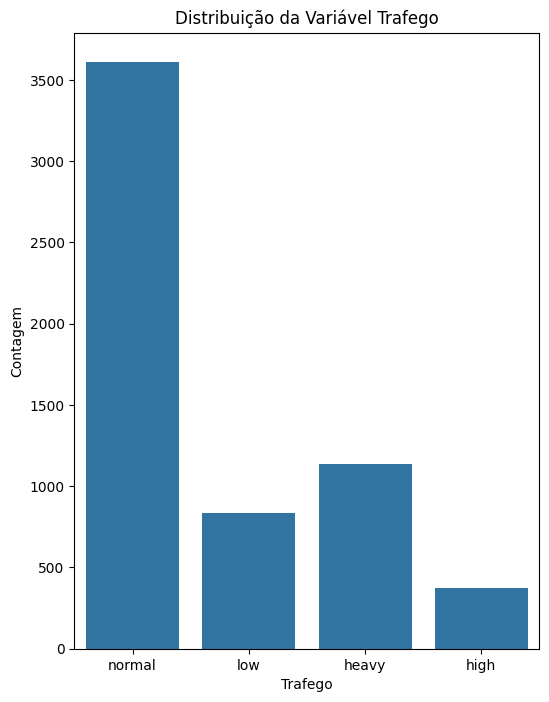

In [8]:
#Análise do variável alvo "Trafego"

class_trafego = {0:"low", 1:"normal", 2:"heavy", 3:"high"}  #Variável utilizada para associar os valores numéricos aos representações da classe

plt.figure(figsize=(6,8))
sns.countplot(x=transito["Trafego"].map(class_trafego),data=transito)
plt.title('Distribuição da Variável Trafego')
plt.xlabel('Trafego')
plt.ylabel('Contagem')

plt.show()

Foram identificadas situações de outliers am alguns atributos do dataset, contudo, por considerar relevante esses dados para proporcionar uma melhor avaliação eles não foram tratados, sendo portando mantidos.

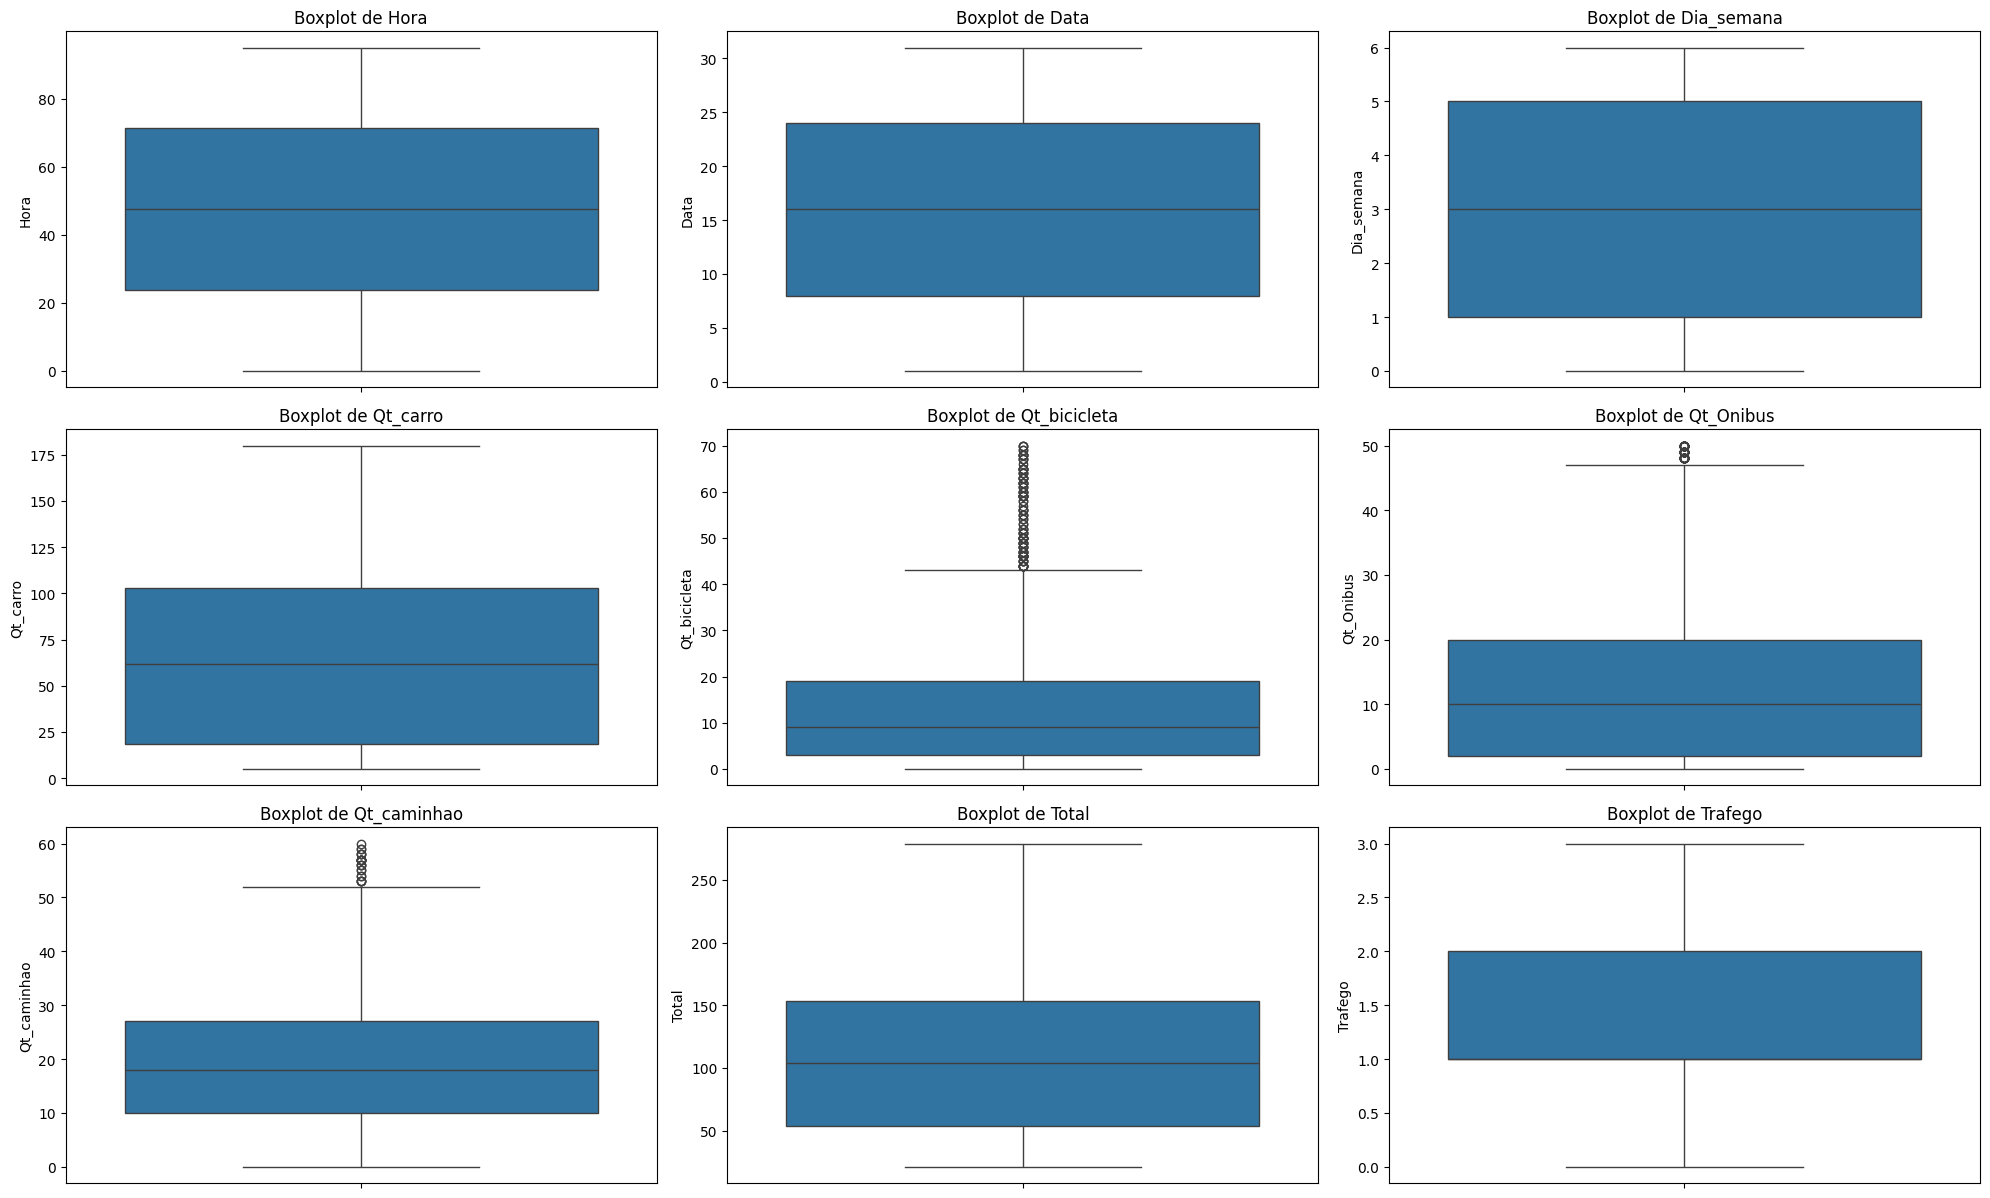

In [9]:
#Avaliação de outliers dos atributos

numeric_vars = ['Hora', 'Data', 'Dia_semana', 'Qt_carro', 'Qt_bicicleta', 'Qt_Onibus', 'Qt_caminhao', 'Total', 'Trafego']

plt.figure(figsize=(20, 20))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=transito[var].dropna())  #Cria um gráfico do tipo boxplot para cada atributo do Dataframe
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

A matriz de correlação possibilitou avaliar a relação entre as variáveis disponíveis, sendo possível identificar que a variável “Total” possui um maior relação com a variável “Qt_carro”.

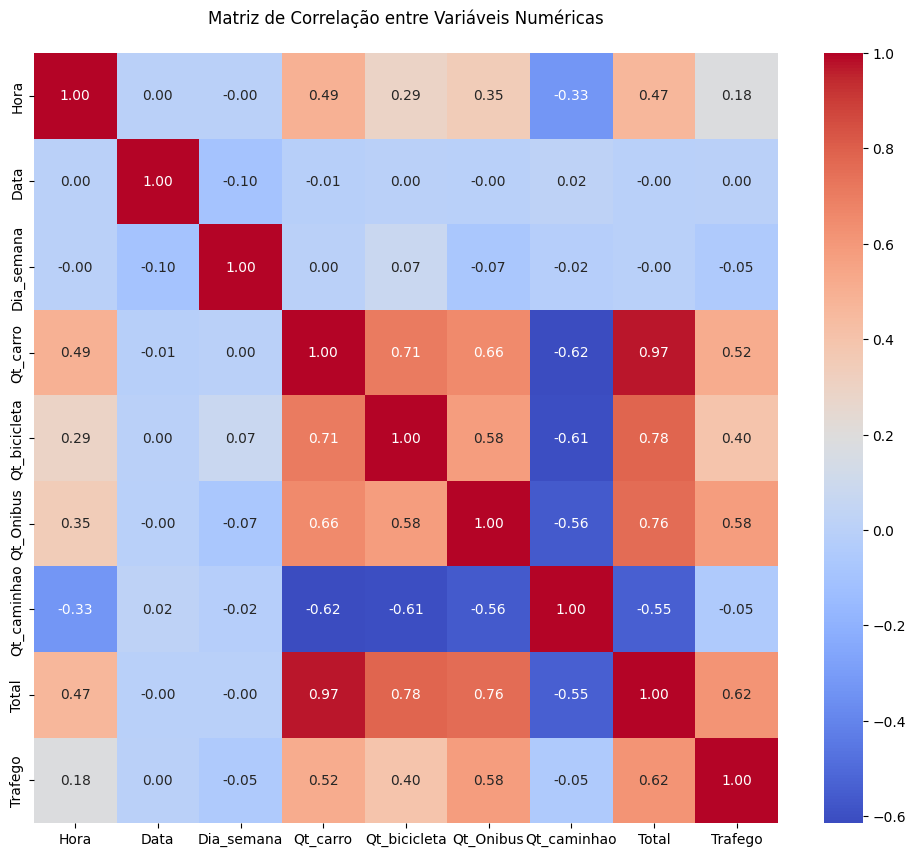

In [10]:
# Realiza a correlação entre as variáveis numéricas

correlation_matrix = transito[numeric_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas\n')
plt.show()

Como o atributo **“Total”** é obtida a partir da soma dos atributos “Qt_carro”, “Qt_bicicleta”, “Qt_onibus” e “Qt_caminhao”, e o objetivo do projeto é desenvolver um modelo que leve em consideração o tipo e quantidade de veículos, foi decido retirar o atributo “Total” do dataframe para focar a análise do modelo nos outros atributos.

In [11]:
#Remoção da coluna "Total" do dataframe

transito = transito.drop(columns=['Total'])


O processo de modelagem e treinamento consiste em preparar conjuntos de dados que serão utilizados para que serão utilizados para treinar e testar os algoritmos de machine learning, possibilitando a modelagem desses algoritmos.

Em seguida, foi realizada a preparação dos dados para a análise com os modelos. Onde foram divididos os seguintes grupos:


  - **X_train**: Grupo de treino contendo atributos;
  - **y_train** : Grupo de treino contendo a classe;
  - **X_test** : Grupo de teste contendo atributos;
  - **y_test** : Grupo de teste contendo a classe;

Após a divisão foram obtidos 4761 registros para treino e 1191 registros para teste.

In [12]:
# Preparação dos dados para análise com o modelos

# Separação em bases de treino e teste (holdout)
array = transito.values
X = array[:,0:7]  # Define as colunas do dataset que são atributos
y = array[:,7]  # Define a coluna do datase que é a classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # Realizada a divisão do grupo de dados para treino e teste


# Informações da quantidade de registros após a divisão dos grupos de dados
print("Dimensões do conjunto de treinamento (features):", X_train.shape,"\n")
print("Dimensões do conjunto de treinamento (alvo):", y_train.shape, "\n")
print("Dimensões do conjunto de teste (features):", X_test.shape, "\n")
print("Dimensões do conjunto de teste (alvo):", y_test.shape)



Dimensões do conjunto de treinamento (features): (4761, 7) 

Dimensões do conjunto de treinamento (alvo): (4761,) 

Dimensões do conjunto de teste (features): (1191, 7) 

Dimensões do conjunto de teste (alvo): (1191,)


Para realizar o tratamento do desbalanceamento da classe foi utilizada a técnica de **undersampling**, que consiste em reduzir o número de amostras da classe majoritária para igualar o tamanho das classes minoritárias. Proporcionando um melhor balanceando para a classe.

Para isso, foi utilizado o método  **“RandomUnderSampler”** que possibilita remover de forma aleatório instâncias da classe majoritária nos dados de treino.

Após o uso do método foram obtidos 2170 registros para treino.

Sendo possível observar através do gráfico que a quantidade de valores atribuídos a situação de tráfego da classe ficou mais balanceada. Ou seja, com valores mais próximos.


Dimensões do desbalanceador (features): (2170, 7) 

Dimensões do desbalanceador (alvo): (2170,) 



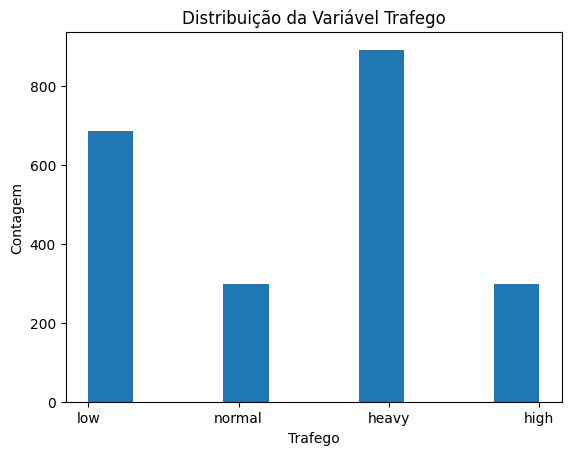

In [13]:
#Tratamento do desbalanceamento da classe

rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
X_train_novo, y_train_novo = rus.fit_resample(X_train, y_train)

#Informações da quantidade de registros após o tratamento do desbalenciamento
print("\nDimensões do desbalanceador (features):", X_train_novo.shape, "\n")
print("Dimensões do desbalanceador (alvo):", y_train_novo.shape, "\n")

valores_numericos = [0,1,2,3]
valores_nominais = ["low","normal","heavy","high"]
plt.hist(y_train_novo)
plt.xticks(valores_numericos, valores_nominais)
plt.title('Distribuição da Variável Trafego')
plt.xlabel('Trafego')
plt.ylabel('Contagem')
plt.show()


### **3. Modelagem e treinamento**


Foi definido no projeto fazer uso da validação cruzada (cross validation) para proporcionar uma avaliação de desempenho dos modelos de machine learning, possibilitando a generalização dos modelos para dados não vistos e identificar possíveis situações de overfitting, quando o modelo está muito ajustado aos dados de treino.
O método de K-fold foi escolhido como forma de implementar a validação cruzada.
Como o projeto irá tratar de um problema de classificação, foram escolhidos os seguintes modelos que serão analisados no processo de validação cruzada:

  - **KNN**(K - Nearest Neighbors );
  
  - **Decision Trees Classifier**, o Scikit-Learn usa o algoritmo Árvore de Classificação e Regressão (CART) para treinar Árvores de Decisão;
  
  - **Gaussian Naive Bayes** ;
  
  - **SVM** (Support Vector Machine), fazendo uso do SVC (Support Vector Classification) disponível no Scikit-Learn;


A métrica escolhida foi **accuracy**(acurácia) que avaliará a média de previsões corretas em relação ao total de previsões.

KNN: 0.919355 (0.020531)
CART: 0.948387 (0.008695)
NB: 0.891705 (0.019687)
SVM: 0.915668 (0.013204)
[0.89861751 0.90322581 0.91705069 0.92626728 0.92165899 0.92626728
 0.89400922 0.92626728 0.9078341  0.93548387]


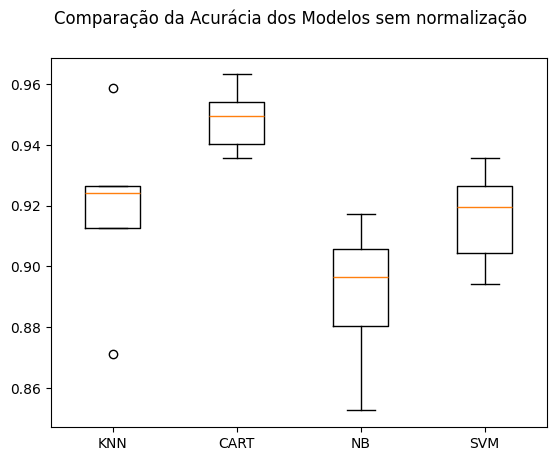

In [14]:
# Modelagem fazendo uso da métrica "accuracy"
#
# Criando os folds para a validação cruzada
num_particoes = 10  #Número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

# Definindo uma seed (semente) global para ser utilizado pelos cálculos do modelo
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# Avaliando um modelo por vez utilizando os grupos de dados obtidos a partir da técnica de ndersampling
for name, model in models:
  cv_results = cross_val_score(model,X_train_novo, y_train_novo, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())  #Informação da média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

print(cv_results)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos sem normalização')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

 A técnica de **normalização** é utilizada na preparação dos dados com o objetivo de ajustar os valores das variáveis numéricas no conjunto de dados para que possuam uma escala comum, diminuindo as distorções e diferenças que possam existir nos intervalos dos valores.

A normalização foi aplicada nos dados de treino obtidos após o processo de  *undersampling* (“**X_train_novo**”), para possibilitar um comparativo da análise de modelo realizada com os mesmos dados sem normalização.

In [15]:
#normalização dos dados
scaler = Normalizer()

X_train_normalizado = scaler.fit_transform(X_train_novo)


Para possibilitar a realização de um comparativo, para a análise dos dados normalizados foi utilizada técnica de **validação cruzada** (cross validation), com o método K-food, utilizando os mesmos modelos utilizados anteriormente (**KNN, CART, Gaussian Naive Bayes e SVC**) e a métrica **accuracy** (acurácia).

KNN: 0.835484 (0.025076)
CART: 0.784793 (0.027267)
NB: 0.779724 (0.026457)
SVM: 0.833180 (0.020171)
[0.82488479 0.80184332 0.8202765  0.82488479 0.86175115 0.84331797
 0.8202765  0.86175115 0.8156682  0.85714286]


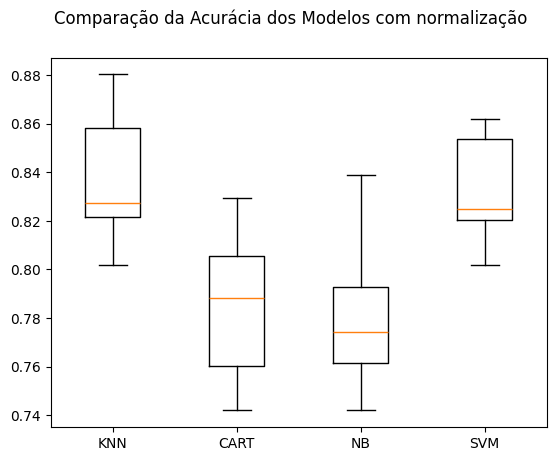

In [16]:
# Modelagem com normalização

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train_normalizado, y_train_novo, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

print(cv_results)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos com normalização')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Analisando os resultados de treino para os dados sem e com normalização, utilizando a métrica de acurácia, temos a seguinte situação:



- **Dados sem normalização**

      KNN: 0.919355 (0.020531)

      CART: 0.948387(0.008695)

      NB: 0.891705 (0.019687)

      SVM: 0.915668 (0.013204)



  - **Dados normalizados**


        KNN: 0.835484(0.025076)

        CART: 0.784793 (0.027267)

        NB: 0.779724 (0.026457)

        SVM: 0.833180 (0.020171)



Ao realizar a análise de modelos sem normalização o modelo **CART** (Decision Trees Classifier) apresentou o melhor resultado, **0,948387 (ou 94,83%) de acurácia.**

Na análise utilizados dados normalizados, o modelo **KNN**( K - Nearest Neighbors) apresentou melhores resultados, 0,835484 (ou 83,54%) de acurácia.

Avaliando as duas situações temos que o modelo **CART apresentou uma melhor acurácia do que o modelo KNN**, devido a isso, o modelo CART foi o escolhido para realizar a análise com os dados de teste.

Após a aplicação dos dados de teste no modelo CART foi possível obter uma acurácia de *0.921914 (ou 92,19%)*.

Posteriormente, serão utilizados ajustes com hiperparâmetros com o intuito de melhorar o desempenho do modelo.


In [17]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeClassifier()

model.fit(X_train_novo, y_train_novo)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste

print(accuracy_score(y_test, predictions))

0.9219143576826196


A **matriz de confusão** é uma técnica utilizada em problemas de classificação com o objetivo de visualizar a frequência de classificação para cada classe do modelo. Possibilitando avaliar a ocorrência de falhas nas previsões do modelo (falsos positivos e falsos negativos).

Fazendo uso dos dados de testes e do modelo **CART** (escolhido durante a fase de treino) foi criada a matriz de confusão a partir dos resultados obtidos, onde foi possível verificar as seguintes situações:



- Dentre as classes existes no dataset (*0:"low", 1:"normal", 2:"heavy", 3:"high"*), a **classe “3” (“high”)** apresentou a menor precisão 0,65 (ou 65%);

		     precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       149
         1.0       0.98      0.91      0.95       722
         2.0       0.88      0.94      0.91       246
         3.0       0.65      0.81      0.72        74





- Na matriz de confusão é possível observar uma maior quantidade de falsos positivos na **classe “3” (“high”)**, *onde ocorreram 60 previsões corretas e ao todo 14 previsões erradas*;


- Também é possível identificar que a maior quantidade dados está presente na **classe “1” (“normal”)**, *onde ocorreram 659 previsões corretas e ao todo 63 previsões erradas*;



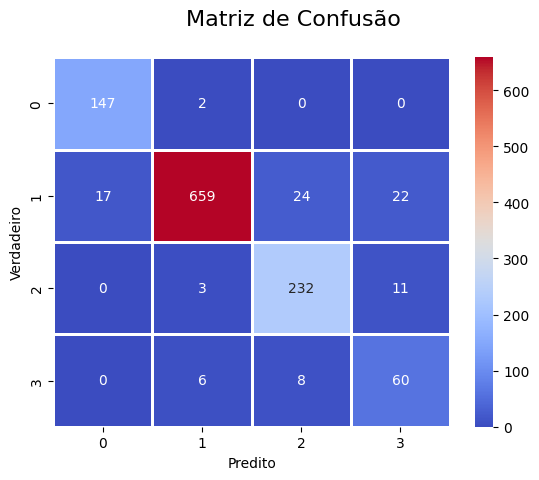

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       149
         1.0       0.98      0.91      0.95       722
         2.0       0.88      0.94      0.91       246
         3.0       0.65      0.81      0.72        74

    accuracy                           0.92      1191
   macro avg       0.85      0.91      0.88      1191
weighted avg       0.93      0.92      0.92      1191



In [18]:

# Matriz de confusão
cf_matrix = confusion_matrix(y_test, predictions)

# Criando o heatmap
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.suptitle('Matriz de Confusão', fontsize=16)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()
print(classification_report(y_test, predictions))

**Hiperparâmtros** são variáveis de configuração nos modelos de machine learning que podem ser ajustadas para proporcionar uma melhor performance e precisão.

Fazendo uso do modelo **CART** (escolhido durante a fase de treino) foram ajustados os hiperparâmetros deste modelo e criada a matriz de confusão a partir dos resultados obtidos, onde foi possível verificar as seguintes situações:



- Dentre as classes existes no dataset (*0:"low", 1:"normal", 2:"heavy", 3:"high"*), a **classe “3”** (“high”) apresentou uma melhor precisão, o que antes era 0,65 (ou 65%) passou a ter 0,78 (ou 78%);

		     precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       149
         1.0       0.99      0.92      0.96       722
         2.0       0.88      0.96      0.92       246
         3.0       0.78      0.93      0.85        74





- Na matriz de confusão foi possível observar uma maior quantidade de falsos positivos na **classe “3”**(“high”) antes ocorriam 60 previsões corretas e 14 previsões erradas. Com os hiperparâmetros, tiveram 69 previsões corretas e 5 previsões erradas;


- Também é possível identificar uma melhora sutil na **classe “1”** (“normal”), antes ocorriam 659 previsões corretas e 63 previsões erradas. Com os hiperparâmetros, tiveram 664 previsões corretas e 58 previsões erradas;



Melhor Score: 0.9424022323600507 

Melhores Parâmetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4} 



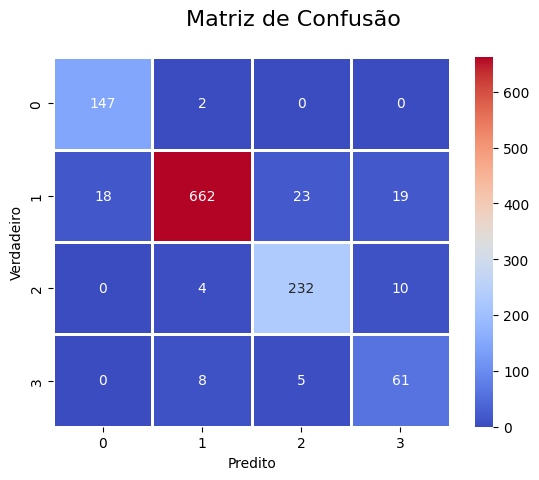

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       149
         1.0       0.98      0.92      0.95       722
         2.0       0.89      0.94      0.92       246
         3.0       0.68      0.82      0.74        74

    accuracy                           0.93      1191
   macro avg       0.86      0.92      0.89      1191
weighted avg       0.93      0.93      0.93      1191



In [19]:

#Análise de hiperparâmetros

param_grid = {
    'max_depth': [1, 4, 10],
    'min_samples_split': [1, 4, 10],
    'criterion': ['gini', 'entropy']
}

cart = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=cart, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_novo, y_train_novo)

print("Melhor Score:", grid_search.best_score_, "\n")
print("Melhores Parâmetros:", grid_search.best_params_, "\n")

best_cart = grid_search.best_estimator_
best_cart_pred = best_cart.predict(X_test)

# Matriz de confusão
cf_matrix = confusion_matrix(y_test, best_cart_pred)

# Criando o heatmap
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.suptitle('Matriz de Confusão', fontsize=16)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()
print(classification_report(y_test, best_cart_pred))

### **4 -Avaliação dos Resultados**


Após a realização de teste do modelo CART (escolhido durante a fase de treino) com e sem hiperparâmetros, temos as seguintes análises:




- Com a utilização dos hiperparâmetros foi possível melhorar a precisão do modelo para realizar a previsão das classes  1 ("normal") e  3 (“high”);
- Na **classe 1 (“normal”)** não obteve um aumento de precisão significativo passando de 0,98 (98%) para 0,99 (99%) com hiperparâmetros;
- Já para a **classe 3 (“high”)** houve uma melhora mais significativa, passando de 0,65 (65%) para 0,78 (78%) com hiperparâmetros;

Essa situação de melhoria da precisão,  foi possível de ser percebida através da matriz de confusão, onde tivemos as seguintes situações:

- **Para classe 1 (“normal”):**

        ◦** Padrão do modelo**: 659 previsões corretas e ao todo 63 previsões erradas;
        ◦ **Com ajustes de hiperparâmetros**: 664 previsões corretas e 58 previsões erradas;
- **Para classe 3 (“high”):**
        ◦ **Padrão do modelo:** 60 previsões corretas e ao todo 14 previsões erradas;
        ◦ **Com ajustes de hiperparâmetros:** 69 previsões corretas e 5 previsões erradas;

Ou seja, a melhoria da precição proporcionada pelos ajustes nos hiperparâmetros justifica fazer uso de metodologia no modelo escolhido para tratar o problema de classificação.


### **5 - Conclusão**



Esse projeto descreveu as principais etapas necessárias para a elaboração de um modelo de previsão de tráfego baseado na análise quantitativa e tipos de veículos. Onde foi possível identificar ajustes necessários no dataset para possibilitar a avaliação do melhor modelo a ser utilizado, destacando-se a necessidade de conversão de variáveis categóricas para numéricas e a remoção da coluna “Total”.

Foi identificado na preparação dos dados que os dados da coluna “Total” influenciavam o resultado dos modelos analisados, acarretando uma acurácia de 100% em quase todos. Como essa coluna foi obtida a partir do somatório de outras colunas mais significativas para projeto a mesma foi removida. Dessa forma, a análise ficou focada nas colunas com informações por tipo de veículo, possibilitando que a análise tivesse um maior foco no objetivo do projeto.

Ao ser identificado o desbalanceamento das classes, durante os testes foi identificado que essa situação estava interferindo nos testes dos modelos proporcionando acurácia de 100% em diversos modelos. Devido a isso, foi necessário fazer uso de técnicas de undersampling, para proporcionando um melhor balanceando para as classes.

Foram realizados testes em diversos modelos que tratam problemas de classificação, e o que apresentou uma melhor eficiência na métrica de acurácia foi o modelo CART (Decision Trees Classifier).

Ao ser elaborado o gráfico de matriz de confusão e o relatório de classificação foi possível identificar que uma das classes (classe “3” – “hard”) encontrava-se com uma precisão mais baixa em relação a outras classes. Devido a isso, foram utilizados os hiperparâmetros para realizar ajustes no modelo CART que possibilitasse uma precisão maior na predição da classe “3”.

Estão previstas atualizações futuras do dataset onde serão inseridas dados referentes a velocidade dos veículos e novas rotas, que possibilitarão um melhor gerenciamento do tráfego. Nesse momento, serão necessárias novas análises para identificar o melhor modelo que irá se adequar a esses dados.